# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. It consists of 14 variables:
<li> AppointmentId: Identification of each appointment </li>
<li> Gender: Male or Female </li>
<li> ScheduleDay: The day the patient set up their appointment </li>
<li> AppointmentDay: The day of appointment </li>
<li> Age: The patient age </li>
<li> Neighbourhood: Where the appointment take place </li>
<li> Scholarship: True / False (Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li> 
<li> Hypertension: True (1) / False (0) </li>
<li> Diabetes: True (1) / False (0)  </li>
<li> Alcoholism: True (1) / False (0)  </li>
<li> Handicap: True (1) / False (0)  </li>
<li> SMS_received: True (1) / False (0)  </li>
<li> No-show: Yes / No (‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.) </li>


### Question(s) for Analysis
<li> How do gender show up to their appointments? </li>
<li> Did Age have an effect on patient appointment? </li>
<li> Did Hypertension, Diabetes and Alcoholism have an effect on patient appointment? </li>
<li> Did patients with scholarship show up more to their appointments? </li>

In [1]:
# import the necessary packages: numpy, pandas, matplotlib
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In the section, It involve gathering, accessing and cleaning of the data. Where we will load the data, access it to inspect any outliers in the data and clean the data for analysis.

### Data Gathering and Accessing

In [2]:
# Load your data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# print out few lines using head
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# dimension of the dataframe
df.shape

(110527, 14)

In [5]:
# details of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# statistics summary of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> In this section, we will be cleaning the dataset by:
<li> Clean the column names for consistent column names </li>
<li> Replace no-show values with integer values for better analysis </li>
<li> Changing the data types of some columns </li>
<li> Drop columns that are not important to the analysis </li>
 

In [7]:
# clean the column names
df = df.rename(columns = {'PatientId' : 'PatientID', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show': 'No_show'})
df.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

In [8]:
#replace No_show values [Yes, No] with [1, 0]
df.No_show = df.No_show.replace(['Yes', 'No'], [1,0])

In [9]:
# change data types
df.PatientID = df.PatientID.astype(int)
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.No_show = df.No_show.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 11.8+ MB


In [10]:
#drop handicap 
df.drop('Handicap', axis=1, inplace=True)

In [11]:
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 ( How do gender show up to their appointments?)

0         F
1         M
2         F
3         F
4         F
5         F
6         F
7         F
8         F
9         F
10        F
11        M
12        F
13        M
14        F
15        F
16        M
17        F
18        F
19        F
20        F
21        F
22        M
23        F
24        F
25        M
26        F
27        F
28        M
29        F
         ..
110497    M
110498    F
110499    F
110500    F
110501    M
110502    F
110503    F
110504    F
110505    F
110506    M
110507    F
110508    F
110509    M
110510    F
110511    F
110512    F
110513    M
110514    F
110515    M
110516    F
110517    F
110518    F
110519    F
110520    F
110521    F
110522    F
110523    F
110524    F
110525    F
110526    F
Name: Gender, Length: 110527, dtype: object

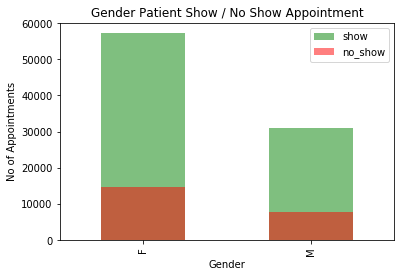

In [49]:
#create dataframe for no_show [yes, no] appointments
show = df.No_show == False
no_show = df.No_show == True

# create patient function for visualizations to avoid repetitive code
def patient(x, label):
    x[show].value_counts().plot(kind = 'bar', alpha = 0.5, color= 'green', label='show')
    x[no_show].value_counts().plot(kind = 'bar', alpha = 0.5, color= 'red', label='no_show')
    plt.legend()
    plt.xlabel(label)
    plt.ylabel('No of Appointments')
    plt.title('{} Patient Show / No Show Appointment'.format(label))
    return x
# recall function to visualize Gender
patient(df.Gender, "Gender")

> 50,000+ of Females show up to their appointment While 30,000+ of Males show up to their appointment.

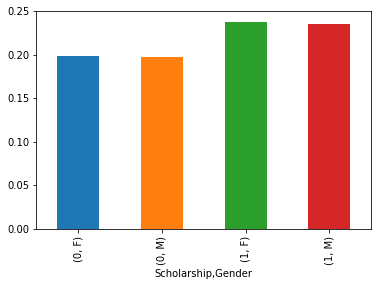

In [30]:
# scholarship and gender relationship
df.groupby(['Scholarship', 'Gender']).No_show.mean().plot(kind='bar')

### Research Question 2  ( Did Age have an effect on patient appointment?)

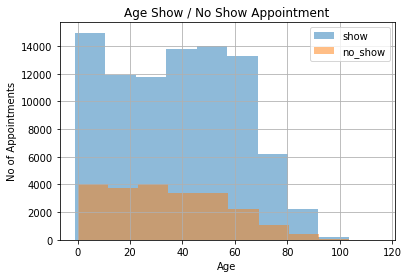

In [41]:
df.Age[show].hist(alpha=0.5, label = 'show')
df.Age[no_show].hist(alpha=0.5, label = 'no_show')
plt.xlabel('Age')
plt.ylabel('No of Appointments')
plt.title('Age Show / No Show Appointment')
plt.legend()

> 14,000+ of Age group (0-10) show up to their appointment. The plot distribution is skewed to the right.

### Research Question 3  ( Did Hypertension, Diabetes and Alcoholism have an effect on patient appointment?)

0         1
1         0
2         0
3         0
4         1
5         1
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        1
26        1
27        0
28        0
29        0
         ..
110497    0
110498    0
110499    1
110500    0
110501    0
110502    0
110503    0
110504    0
110505    0
110506    0
110507    0
110508    0
110509    0
110510    0
110511    0
110512    0
110513    0
110514    0
110515    1
110516    0
110517    0
110518    0
110519    0
110520    0
110521    0
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Hypertension, Length: 110527, dtype: int64

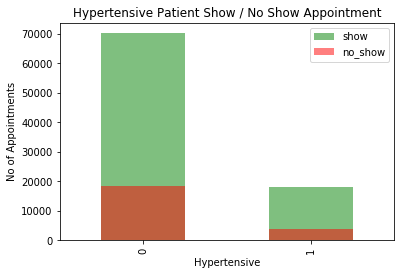

In [48]:
# recall function to visualize hypertensive patients
patient(df.Hypertension, "Hypertensive")

> 60,000+ of Non-Hypertensive patients show up to their appointments

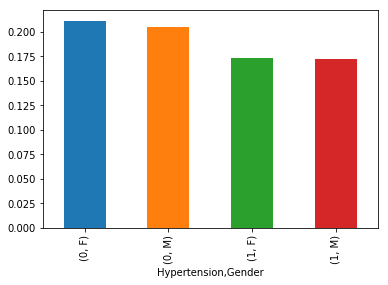

In [112]:
# hypertension and gender relationship
df.groupby(['Hypertension', 'Gender']).No_show.mean().plot(kind='bar')

0         0
1         0
2         0
3         0
4         1
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
110497    0
110498    0
110499    1
110500    0
110501    0
110502    0
110503    0
110504    0
110505    0
110506    0
110507    0
110508    0
110509    0
110510    0
110511    0
110512    0
110513    0
110514    0
110515    0
110516    0
110517    0
110518    0
110519    0
110520    0
110521    0
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Diabetes, Length: 110527, dtype: int64

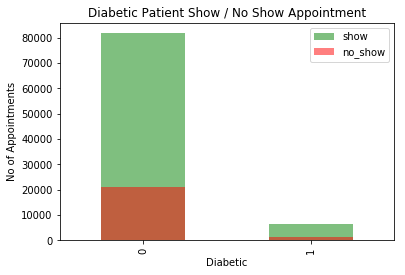

In [51]:
# diabetes patient
# recall function to visualize diabetic patients
patient(df.Diabetes, "Diabetic")

> 80,000+ of Non-Diabetic patients show up to their appointments compare to less than 5000 of Diabetic patients.

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
110497    0
110498    0
110499    0
110500    0
110501    0
110502    0
110503    0
110504    0
110505    0
110506    0
110507    0
110508    0
110509    0
110510    0
110511    0
110512    0
110513    0
110514    0
110515    0
110516    0
110517    0
110518    0
110519    0
110520    0
110521    0
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Alcoholism, Length: 110527, dtype: int64

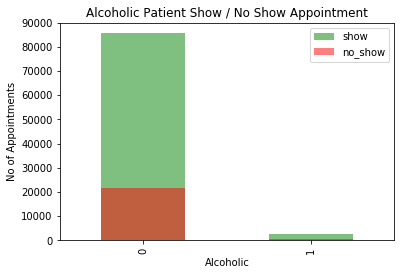

In [53]:
# alcoholic patients
# recall function to visualize alcoholic patients
patient(df.Alcoholism, "Alcoholic")

> 85,000+ of Non-Alcoholic patients show up to their appointments.

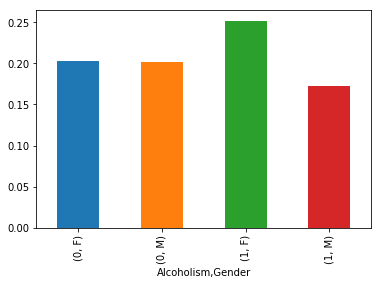

In [116]:
# alcocholism and gender relationship
df.groupby(['Alcoholism', 'Gender']).No_show.mean().plot(kind='bar')

### Research Question 4  (Did patients with scholarship show up more to their appointments?)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        0
16        0
17        1
18        1
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
110497    0
110498    0
110499    0
110500    0
110501    0
110502    0
110503    0
110504    0
110505    0
110506    0
110507    0
110508    0
110509    0
110510    0
110511    0
110512    0
110513    0
110514    0
110515    0
110516    0
110517    0
110518    0
110519    0
110520    0
110521    0
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Scholarship, Length: 110527, dtype: int64

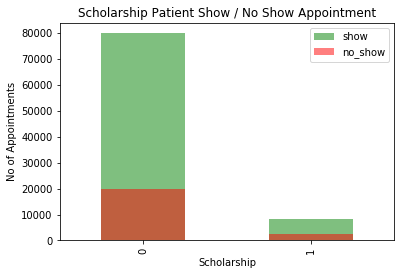

In [54]:
# recall function to visualize Scholarship patients
patients(df.Scholarship, "Scholarship")

> 70,000+ of Non-Scholarship patients show up to their appointments compare to less than 10,000 Scholarship patients.

<a id='conclusions'></a>
## Conclusions

> From the analysis above:
<li> Females show up more to their appointment compare to Male Gender. </li>
<li> Young patients tend to show up more to their appointment compare to adult patients </li>
<li> Hypertensive patients do not show up more to their appintment compare to Non-Hypertensive patients </li>
<li> Diabetic patients do not show up more to their appintment compare to Non-Diabetic patients </li>
<li> Non-Alcoholic patients tend to show up more to their appintment compare to Alcoholic patients </li>
<li> Patient with scholarship show up more to their appointment compare to non-scholarship patients </li>

> Limitation:
<li> There is no location of the patients: The location of patients should be provided to help explore more analysis on the no show appointments.

## References

<li><a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments">Medical Appointment No Shows</a></li>

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Copy1.ipynb'])

0